In [29]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import numpy as np
import re
import sklearn

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

%matplotlib inline

# Ignore warning
import warnings
warnings.filterwarnings("ignore")

# Ambil Dataset
df_train = pd.read_csv('https://raw.githubusercontent.com/zahransyah/Intrusion-Detection-System/main/Train_data.csv/Train_data.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/zahransyah/Intrusion-Detection-System/main/test_data.csv/test_data.csv')

# Drop data tidak relevan
df_train = df_train.drop(['Unnamed: 0'], axis=1, errors='ignore')
df_test = df_test.drop(['Unnamed: 0'], axis=1, errors='ignore')

# **Klasifikasi Jenis Serangan**

In [30]:
# Pemrosesan data

# Encoding variabel kategorikal
categorical_features = ['protocol_type', 'service', 'flag']
for feature in categorical_features:
    encoder = LabelEncoder()
    encoder.fit(df_train[feature])
    df_train[feature] = encoder.transform(df_train[feature])
    df_test[feature] = encoder.transform(df_test[feature])

# Normalisasi data
scaler = StandardScaler()
numeric_features = ['duration', 'src_bytes', 'dst_bytes']
df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])
df_test[numeric_features] = scaler.transform(df_test[numeric_features])

# Pembagian dataset menjadi atribut (X) dan target (Y)
X_train = df_train.drop('xAttack', axis=1)
Y_train = df_train['xAttack']
X_test = df_test.drop('xAttack', axis=1)
Y_test = df_test['xAttack']

# Print total data
print("Jumlah train data:", X_train.shape[0])
print("Jumlah test data:", X_test.shape[0])

Jumlah train data: 125973
Jumlah test data: 10000


In [31]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,-0.110249,0,18,1,-0.007679,-0.004919,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,-0.110249,2,39,1,-0.007737,-0.004919,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,-0.110249,0,44,3,-0.007762,-0.004919,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,-0.110249,0,22,1,-0.007723,-0.002891,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,-0.110249,0,22,1,-0.007728,-0.004814,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [32]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,-0.110249,0,22,3,-0.007762,-0.004919,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,-0.110249,0,22,1,-0.007709,-0.004457,0,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,-0.110249,0,22,1,-0.007721,-0.004407,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,-0.110249,0,22,1,-0.007711,-0.004604,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,-0.110249,0,18,1,-0.007636,-0.004919,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal


In [33]:
# Mendeteksi serangan yang terjadi
X_train = df_train.drop('xAttack', axis=1)
Y_train = df_train.loc[:,['xAttack']]
X_test = df_test.drop('xAttack', axis=1)
Y_test = df_test.loc[:,['xAttack']]

# Print hasil
print(Y_train.apply(lambda col: col.unique()))

  xAttack
0  normal
1     dos
2     r2l
3   probe
4     u2r


In [34]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [35]:
le = preprocessing.LabelEncoder()
enc = OneHotEncoder()
lb = preprocessing.LabelBinarizer()

In [36]:
X_train['protocol_type'] = le.fit_transform(X_train['protocol_type'])
# enc.fit_transform(X_train['protocol_type'])

X_test['protocol_type'] = le.fit_transform(X_test['protocol_type'])
# enc.fit_transform(X_test['protocol_type'])

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.110249,0,18,1,-0.007679,-0.004919,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,-0.110249,2,39,1,-0.007737,-0.004919,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,-0.110249,0,44,3,-0.007762,-0.004919,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,-0.110249,0,22,1,-0.007723,-0.002891,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,-0.110249,0,22,1,-0.007728,-0.004814,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [37]:
Y_train['xAttack'] = le.fit_transform(Y_train['xAttack'])
lb.fit_transform(Y_train['xAttack'])

Y_test['xAttack'] = le.fit_transform(Y_test['xAttack'])
lb.fit_transform(Y_test['xAttack'])

Y_train.describe()

,xAttack
count,125973.000000
mean,0.744985
std,0.653748
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,4.000000


# **Deviation**

In [59]:
#except continuous feature
con_list = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'su_attempted', 'is_host_login', 'is_guest_login']
con_train = X_train.drop(con_list, axis=1)

#drop n smallest std features
stdtrain = con_train.std(axis=0)
std_X_train = stdtrain.to_frame()
std_X_train.nsmallest(10, columns=0).head(10)

,0
num_outbound_cmds,0.000000
urgent,0.014366
num_shells,0.022181
root_shell,0.036603
num_failed_logins,0.045239
num_access_files,0.099370
dst_host_srv_diff_host_rate,0.112564
diff_srv_rate,0.180314
dst_host_diff_srv_rate,0.188922
wrong_fragment,0.253530


In [60]:
X_train = X_train.drop(['num_outbound_cmds'], axis=1)
X_test = X_test.drop(['num_outbound_cmds'], axis=1)

df_train = pd.concat([X_train, Y_train], axis=1)
df_train.head()

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.110249,0,18,1,-0.007679,-0.004919,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,-0.110249,2,39,1,-0.007737,-0.004919,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,-0.110249,0,44,3,-0.007762,-0.004919,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,-0.110249,0,22,1,-0.007723,-0.002891,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,-0.110249,0,22,1,-0.007728,-0.004814,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [61]:
stdrop_list = ['urgent', 'num_shells', 'root_shell',
        'num_failed_logins', 'num_access_files', 'dst_host_srv_diff_host_rate',
        'diff_srv_rate', 'dst_host_diff_srv_rate', 'wrong_fragment']

X_test_stdrop = X_test.drop(stdrop_list, axis=1)

X_train_stdrop = X_train.drop(stdrop_list, axis=1)

df_train_stdrop = pd.concat([X_train_stdrop, Y_train], axis=1)

df_train_stdrop.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,-0.110249,0,18,1,-0.007679,-0.004919,0,0,0,0,...,0.00,150,25,0.17,0.17,0.00,0.00,0.05,0.00,1
1,-0.110249,2,39,1,-0.007737,-0.004919,0,0,0,0,...,0.00,255,1,0.00,0.88,0.00,0.00,0.00,0.00,1
2,-0.110249,0,44,3,-0.007762,-0.004919,0,0,0,0,...,0.00,255,26,0.10,0.00,1.00,1.00,0.00,0.00,0
3,-0.110249,0,22,1,-0.007723,-0.002891,0,0,1,0,...,0.00,30,255,1.00,0.03,0.03,0.01,0.00,0.01,1
4,-0.110249,0,22,1,-0.007728,-0.004814,0,0,1,0,...,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,1


# **Linear Regression**

In [38]:
from sklearn import linear_model

LR = linear_model.LinearRegression()

LR.fit(X_train, Y_train)

LinearRegression()

In [39]:
lr_score = LR.score(X_test, Y_test)
print('Linear regression processing ,,,')
print('Linear regression Score: %.2f %%' % lr_score)

Linear regression processing ,,,
Linear regression Score: 0.33 %


In [40]:
# Esemble Method Library
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

In [41]:
# Esemble Method Variable

AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=1.0)
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='auto', bootstrap=True)
ET = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='auto', bootstrap=False)
GB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, max_features='auto')

In [42]:
y_train = Y_train['xAttack'].ravel()
x_train = X_train.values
x_test = X_test.values

# **Ensemble Model**

In [43]:
AB.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [44]:
AB_feature = AB.feature_importances_
AB_feature

ab_score = AB.score(X_test, Y_test)

print('AdaBoostClassifier processing ,,,')
print('AdaBoostClassifier Score: %.3f %%' % ab_score)

AdaBoostClassifier processing ,,,
AdaBoostClassifier Score: 0.757 %


In [45]:
RF.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=10)

In [46]:
RF_feature = RF.feature_importances_
RF_feature

rf_score = RF.score(X_test, Y_test)

print('RandomForestClassifier processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf_score)

RandomForestClassifier processing ,,,
RandomForestClassifier Score: 0.769 %


In [47]:
ET.fit(X_train, Y_train)

ExtraTreesClassifier(max_features='auto', n_estimators=10)

In [48]:
ET_feature = ET.feature_importances_
ET_feature

et_score = ET.score(X_test, Y_test)

print('ExtraTreesClassifier processing ,,,')
print('ExtraTreeClassifier: %.3f %%' % et_score)

ExtraTreesClassifier processing ,,,
ExtraTreeClassifier: 0.768 %


In [49]:
GB.fit(X_train, Y_train)

GradientBoostingClassifier(loss='deviance', max_features='auto',
                           n_estimators=200)

In [50]:
GB_feature = GB.feature_importances_
GB_feature

gb_score = GB.score(X_test, Y_test)

print('GradientBoostingClassifier processing ,,,')
print('GradientBoostingClassifier Score: %.3f %%' % gb_score)

GradientBoostingClassifier processing ,,,
GradientBoostingClassifier Score: 0.767 %


# **Features Affect Comparison From Each Esemble Model**

In [51]:
cols = X_train.columns.values

feature_df = pd.DataFrame({'features': cols,
                           'AdaBoost' : AB_feature,
                           'RandomForest' : RF_feature,
                           'ExtraTree' : ET_feature,
                           'GradientBoost' : GB_feature
                          })
feature_df.head(11)

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
0,duration,6.581790e-05,0.003777,0.001640,0.001522
1,protocol_type,4.604258e-01,0.022402,0.020715,0.011417
2,service,5.202505e-01,0.021038,0.030743,0.007734
3,flag,3.873079e-05,0.019312,0.056636,0.001154
4,src_bytes,6.713567e-03,0.116443,0.019405,0.361394
5,dst_bytes,1.450351e-03,0.140805,0.004885,0.062356
6,land,4.668146e-06,0.000109,0.000045,0.000036
7,wrong_fragment,9.541922e-05,0.006901,0.015253,0.013343
8,urgent,8.234864e-07,0.000039,0.000025,0.000202
9,hot,9.225423e-05,0.003526,0.006514,0.003263


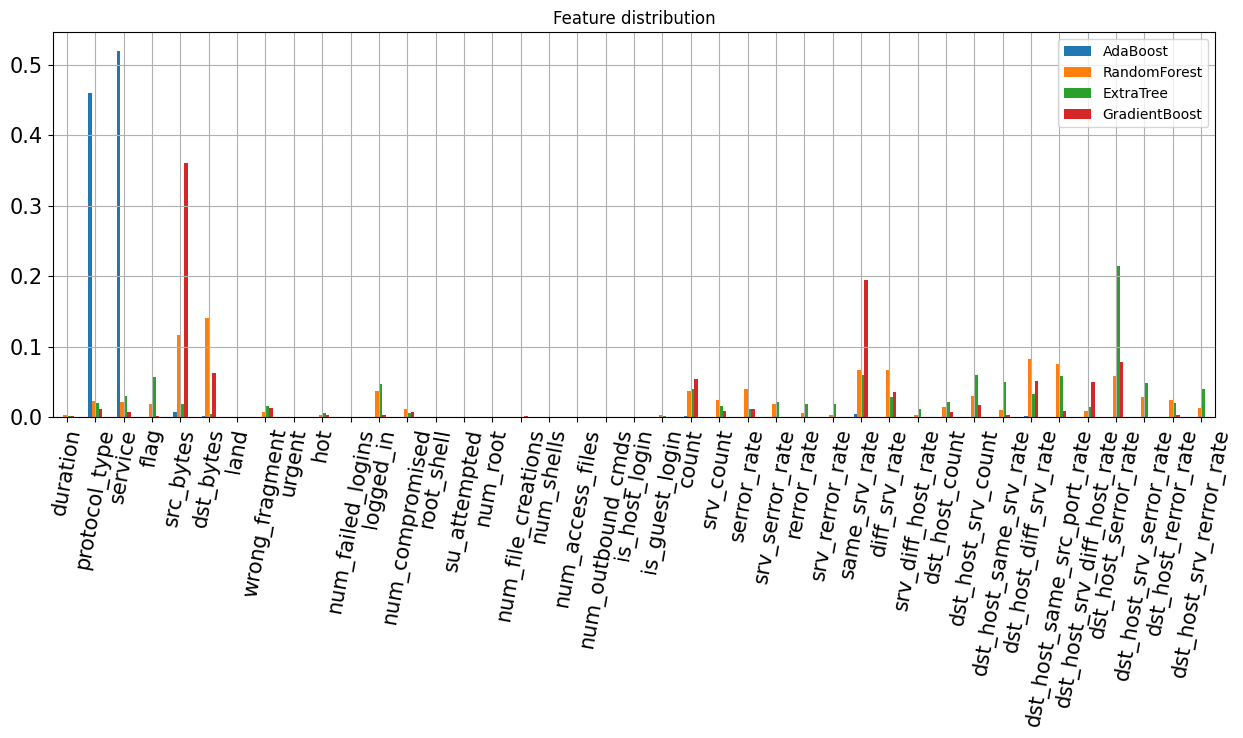

In [52]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

graph = feature_df.plot.bar(figsize = (15, 5), title = 'Feature distribution', grid=True, legend=True, fontsize = 15,
                            xticks=feature_df.index)
graph.set_xticklabels(feature_df.features, rotation = 80)

# Menghapus text pada penjelasan
for text in graph.get_xticklabels():
    text.set_visible(True)

# **Extract Features & Delete Duplicates**

In [53]:
# Extract twelve features from each ensemble model
a_f = feature_df.nlargest(12, 'AdaBoost')
e_f = feature_df.nlargest(12, 'ExtraTree')
g_f = feature_df.nlargest(12, 'GradientBoost')
r_f = feature_df.nlargest(12, 'RandomForest')

In [54]:
# Hasil dari features
result = pd.concat([a_f, e_f, g_f, r_f])

# Hapus fitur
result = result.drop_duplicates()
result

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
2,service,0.520251,0.021038,0.030743,0.007734
1,protocol_type,0.460426,0.022402,0.020715,0.011417
4,src_bytes,0.006714,0.116443,0.019405,0.361394
28,same_srv_rate,0.004406,0.066923,0.059541,0.194872
22,count,0.002364,0.037624,0.040491,0.054396
34,dst_host_diff_srv_rate,0.001812,0.082477,0.033080,0.051002
5,dst_bytes,0.001450,0.140805,0.004885,0.062356
35,dst_host_same_src_port_rate,0.000785,0.074975,0.058724,0.008546
37,dst_host_serror_rate,0.000344,0.058323,0.214159,0.078072
32,dst_host_srv_count,0.000313,0.030771,0.060490,0.017988


In [57]:
# Mendefinisikan hasil sebagai "fitur terpilih"
selected_features = result['features'].values.tolist()
selected_features

['service',
 'protocol_type',
 'src_bytes',
 'same_srv_rate',
 'count',
 'dst_host_diff_srv_rate',
 'dst_bytes',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'num_compromised',
 'flag',
 'dst_host_srv_serror_rate',
 'logged_in',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_diff_host_rate',
 'diff_srv_rate',
 'wrong_fragment',
 'serror_rate']

# **Training Exception of Features**

In [62]:
AB.fit(X_train_stdrop, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [63]:
ab2_score = AB.score(X_test_stdrop, Y_test)

print('AdaBoostClassifier_stdrop processing ,,,')
print('AdaBoostClasifier Score: %.3f %%' % ab2_score)

AdaBoostClassifier_stdrop processing ,,,
AdaBoostClasifier Score: 0.736 %


In [64]:
RF.fit(X_train_stdrop, Y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=10)

In [65]:
rf2_score = RF.score(X_test_stdrop, Y_test)

print('RandomForestClassifier_stdrop processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf2_score)

RandomForestClassifier_stdrop processing ,,,
RandomForestClassifier Score: 0.747 %


In [66]:
ET.fit(X_train_stdrop, Y_train)

ExtraTreesClassifier(max_features='auto', n_estimators=10)

In [67]:
et2_score = ET.score(X_test_stdrop, Y_test)

print('ExtraTreesClassifier_stdrop processing ,,,')
print('ExtraTreesClassifier Score: %.3f %%' % et2_score)

ExtraTreesClassifier_stdrop processing ,,,
ExtraTreesClassifier Score: 0.759 %


In [68]:
GB.fit(X_train_stdrop, Y_train)

GradientBoostingClassifier(loss='deviance', max_features='auto',
                           n_estimators=200)

In [69]:
gb2_score = GB.score(X_test_stdrop, Y_test)

print('GradientBoostingClassifier_stdrop processing ,,,')
print('GradientBoostingClassifier Score: %.2f %%' % gb2_score)

GradientBoostingClassifier_stdrop processing ,,,
GradientBoostingClassifier Score: 0.75 %


In [70]:
# Hasil train exception features dengan standar deviasi kecil
X_train_ens = X_train[selected_features]
X_train_ens.head()

X_test_ens = X_test[selected_features]
X_test_ens.head()

,service,protocol_type,src_bytes,same_srv_rate,count,dst_host_diff_srv_rate,dst_bytes,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_same_srv_rate,num_compromised,flag,dst_host_srv_serror_rate,logged_in,dst_host_srv_rerror_rate,dst_host_srv_diff_host_rate,diff_srv_rate,wrong_fragment,serror_rate
0,22,0,-0.007762,1.0,110,0.00,-0.004919,0.00,0.65,255,1.00,0,3,0.65,0,0.32,0.00,0.0,0,1.0
1,22,0,-0.007709,1.0,1,0.00,-0.004457,1.00,0.00,254,1.00,0,1,0.00,1,0.00,0.06,0.0,0,0.0
2,22,0,-0.007721,1.0,5,0.00,-0.004407,0.01,0.01,255,1.00,0,1,0.00,1,0.00,0.05,0.0,0,0.0
3,22,0,-0.007711,1.0,4,0.00,-0.004604,0.00,0.00,255,1.00,0,1,0.00,1,0.00,0.00,0.0,0,0.0
4,18,0,-0.007636,1.0,1,0.03,-0.004919,0.18,0.00,19,0.18,0,1,0.00,0,0.00,0.00,0.0,0,0.0


# **Korelasi**

<Axes: >

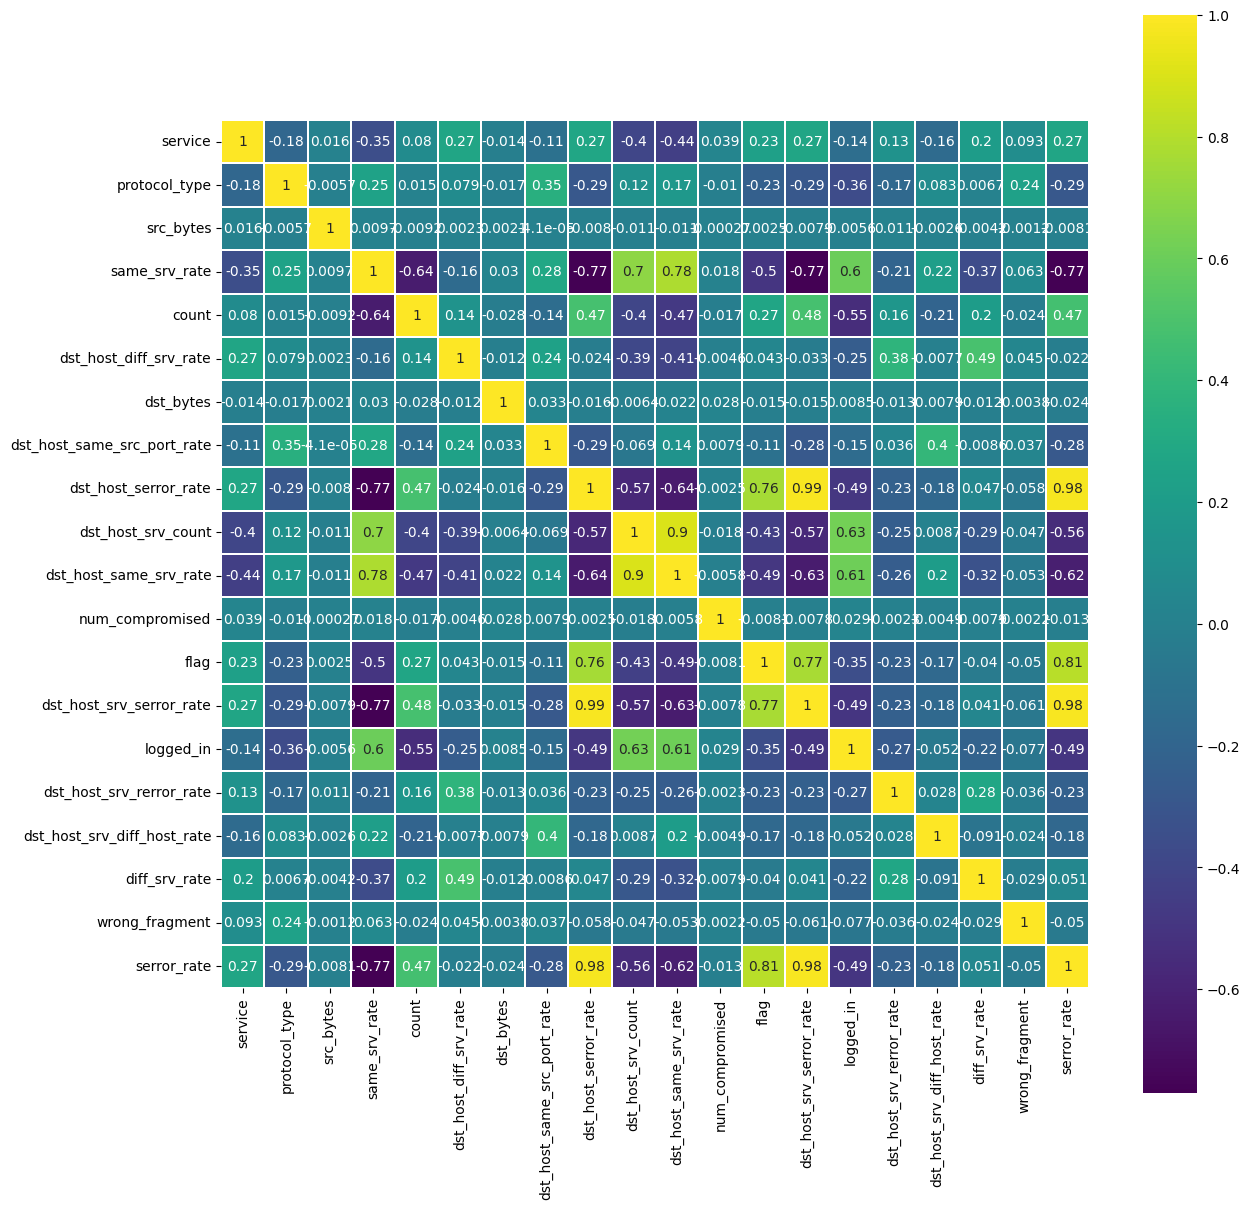

In [73]:
sample = X_train_ens[:10000]

colormap = plt.cm.viridis
plt.figure(figsize=(14, 14))
sns.heatmap(sample.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [74]:
# Berdasarkan grafik di atas, fitur berikut memiliki high dependency
selected2 = ['flag', 'dst_host_serror_rate', 'serror_rate']
X_train_cordrop = X_train_ens.drop(selected2, axis=1)
X_train_cordrop.describe()

X_test_cordrop = X_test_ens.drop(selected2, axis=1)
X_test_cordrop.describe()

,service,protocol_type,src_bytes,same_srv_rate,count,dst_host_diff_srv_rate,dst_bytes,dst_host_same_src_port_rate,dst_host_srv_count,dst_host_same_srv_rate,num_compromised,dst_host_srv_serror_rate,logged_in,dst_host_srv_rerror_rate,dst_host_srv_diff_host_rate,diff_srv_rate,wrong_fragment
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,31.287400,0.278600,-0.006596,0.739925,80.152400,0.089412,-0.004422,0.133167,139.645700,0.605769,0.020500,0.097781,0.436600,0.230181,0.020102,0.089752,0.009000
std,14.129118,0.657134,0.014778,0.413711,129.028094,0.218190,0.004991,0.307154,111.548555,0.436278,0.289289,0.279651,0.495989,0.403294,0.089353,0.252240,0.146701
min,0.000000,0.000000,-0.007762,0.000000,1.000000,0.000000,-0.004919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,-0.007762,0.200000,1.000000,0.000000,-0.004919,0.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,0.000000,-0.007753,1.000000,8.000000,0.020000,-0.004908,0.000000,159.500000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44.000000,0.000000,-0.007714,1.000000,126.000000,0.060000,-0.004770,0.030000,255.000000,1.000000,0.000000,0.000000,1.000000,0.220000,0.010000,0.060000,0.000000
max,63.000000,2.000000,1.064016,1.000000,511.000000,1.000000,0.314653,1.000000,255.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


# **Modeling dari metode klasifikasi**

In [75]:
AB.fit(X_train_cordrop, Y_train)

# Akurasi dari AdaBoost
ab_finalscore = AB.score(X_test_cordrop, Y_test)

print('AdaBoostClassifier_final processing ,,,')
print('AdaBoostClassifier_final Score: %.3f %%' % ab_finalscore)

AdaBoostClassifier_final processing ,,,
AdaBoostClassifier_final Score: 0.746 %


In [76]:
RF.fit(X_train_cordrop, Y_train)

# Akurasi dari Random Forest
rf_finalscore = RF.score(X_test_cordrop, Y_test)

print('RandomForestClassifier_final processing ,,,')
print('RandomForestClassifier_final Score: %.3f %%' % rf_finalscore)

RandomForestClassifier_final processing ,,,
RandomForestClassifier_final Score: 0.760 %


In [77]:
ET.fit(X_train_cordrop, Y_train)

# Akurasi dari Extra Trees Classifier
et_finalscore = ET.score(X_test_cordrop, Y_test)

print('ExtraTreesClassifier_final processing ,,,')
print('ExtraTreesClassifier_final Score: %.3f %%' % et_finalscore)

ExtraTreesClassifier_final processing ,,,
ExtraTreesClassifier_final Score: 0.765 %


In [78]:
GB.fit(X_train_cordrop, Y_train)

# Akurasi dari Gradient Boost
gb_finalscore = GB.score(X_test_cordrop, Y_test)

print('GradientBoostClassifier_final processing ,,,')
print('GradientBoostClassifier_final Score: %.3f %%' % gb_finalscore)

GradientBoostClassifier_final processing ,,,
GradientBoostClassifier_final Score: 0.756 %


In [79]:
LR.fit(X_train_cordrop, Y_train)

# Akurasi dari Linear Regression
lr_finalscore = LR.score(X_test_cordrop, Y_test)

print('LinearRegression_final processing ,,,')
print('LinearRegression_final Score: %.3f %%' % lr_finalscore)

LinearRegression_final processing ,,,
LinearRegression_final Score: 0.260 %


In [87]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)

MLP.fit(X_train_cordrop, Y_train)

mlp_finalscore = MLP.score(X_test_cordrop, Y_test)

print('MLP_final processing ,,,')
print('MLP_final Score: %.3f %%' % mlp_finalscore)

MLP_final processing ,,,
MLP_final Score: 0.632 %


# **Hasil**

In [81]:
# Mengurutkan akurasi model 1
first_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [lr_score, ab_score, rf_score, et_score, gb_score]}

result_df = pd.DataFrame(data = first_model)
result_df

,Model,accuracy
0,Linear Regression,0.334003
1,Adaboost,0.756700
2,RandomForest,0.769100
3,ExtraTrees,0.767700
4,GradientBoost,0.767000


[Text(0, 0, 'Linear Regression'),
 Text(1, 0, 'Adaboost'),
 Text(2, 0, 'RandomForest'),
 Text(3, 0, 'ExtraTrees'),
 Text(4, 0, 'GradientBoost')]

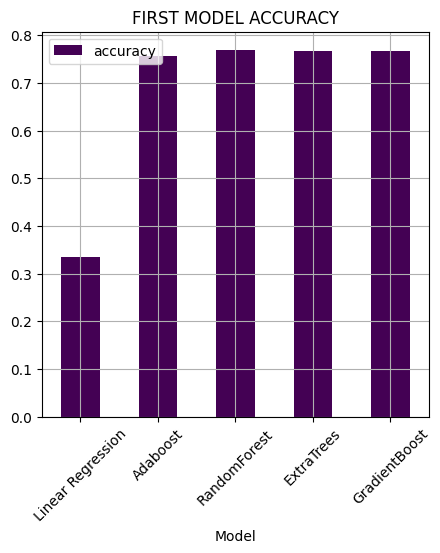

In [82]:
# Grafik dari hasil train dan test model 1
r1 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(5, 5), grid=True, title='FIRST MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r1.set_xticklabels(result_df.Model, rotation = 45)

In [83]:
# Mengurutkan akurasi model 2 (Exception Features)
second_model = {'Model': ['Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [ab2_score, rf2_score, et2_score, gb2_score]}

result_df = pd.DataFrame(data = second_model)
result_df

,Model,accuracy
0,Adaboost,0.7357
1,RandomForest,0.7474
2,ExtraTrees,0.7593
3,GradientBoost,0.7494


[Text(0, 0, 'Adaboost'),
 Text(1, 0, 'RandomForest'),
 Text(2, 0, 'ExtraTrees'),
 Text(3, 0, 'GradientBoost')]

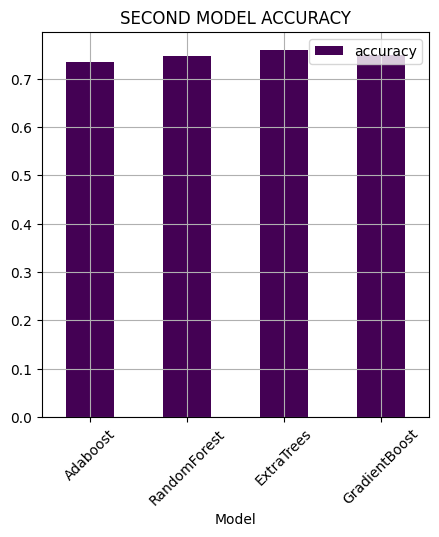

In [84]:
# Grafik dari hasil train dan test model 2
r2 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(5, 5), grid=True, title='SECOND MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r2.set_xticklabels(result_df.Model, rotation = 45)

In [85]:
# Hasil Final
final_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost', 'MLP'],
               'accuracy' : [lr_finalscore, ab_finalscore, rf_finalscore, et_finalscore, gb_finalscore, mlp_finalscore]}

result_df = pd.DataFrame(data = final_model)
result_df

,Model,accuracy
0,Linear Regression,0.259567
1,Adaboost,0.745500
2,RandomForest,0.759700
3,ExtraTrees,0.764700
4,GradientBoost,0.756200
5,MLP,0.753600


[Text(0, 0, 'Linear Regression'),
 Text(1, 0, 'Adaboost'),
 Text(2, 0, 'RandomForest'),
 Text(3, 0, 'ExtraTrees'),
 Text(4, 0, 'GradientBoost'),
 Text(5, 0, 'MLP')]

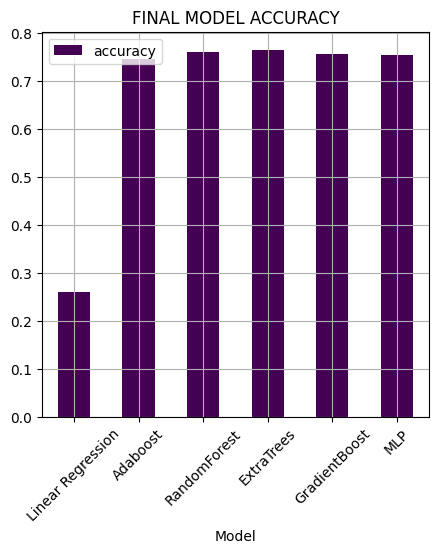

In [86]:
# Grafik hasil final
r3 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(5, 5), grid=True, title='FINAL MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r3.set_xticklabels(result_df.Model, rotation = 45)

# **DoS IDS**

In [55]:
# Menginisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan encoding pada kolom 'xAttack' (target)
df_train['xAttack'] = label_encoder.fit_transform(df_train['xAttack'])
df_test['xAttack'] = label_encoder.transform(df_test['xAttack'])

# Memisahkan fitur (X) dan target (Y) pada data training
X_train = df_train.drop('xAttack', axis=1)
Y_train = df_train['xAttack']

# Memisahkan fitur (X) dan target (Y) pada data testing
X_test = df_test.drop('xAttack', axis=1)
Y_test = df_test['xAttack']

# Menampilkan 5 baris pertama dari data training
print("Data Training:")
print(X_train.head())

# Menampilkan 5 baris pertama dari data testing
print("Data Testing:")
print(X_test.head())

Data Training:
   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0 -0.110249              0       18     1  -0.007679  -0.004919     0   
1 -0.110249              2       39     1  -0.007737  -0.004919     0   
2 -0.110249              0       44     3  -0.007762  -0.004919     0   
3 -0.110249              0       22     1  -0.007723  -0.002891     0   
4 -0.110249              0       22     1  -0.007728  -0.004814     0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0               0       0    0  ...             150                  25   
1               0       0    0  ...             255                   1   
2               0       0    0  ...             255                  26   
3               0       0    0  ...              30                 255   
4               0       0    0  ...             255                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                 

In [56]:
# DoS Detection

from sklearn.metrics import accuracy_score

# Membuat objek Random Forest Classifier
rf_model = RandomForestClassifier()

# Melatih model menggunakan data training
rf_model.fit(X_train, Y_train)

# Melakukan prediksi pada data testing
Y_pred = rf_model.predict(X_test)

# Menampilkan laporan klasifikasi
print(classification_report(Y_test, Y_pred))

# Menampilkan akurasi dengan persentase
accuracy = (accuracy_score(Y_test, Y_pred) * 100).round(2)
print("Accuracy:", accuracy, "%")

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      3332
           1       0.65      0.97      0.78      4329
           2       0.84      0.67      0.75      1053
           3       1.00      0.02      0.03      1199
           4       1.00      0.01      0.02        87

    accuracy                           0.75     10000
   macro avg       0.89      0.49      0.49     10000
weighted avg       0.82      0.75      0.71     10000

Accuracy: 75.35 %
